In [12]:
import cv2
from matplotlib import pyplot as plt
import numpy as np 

In [13]:
def img_load(root):
    img=cv2.imread(root)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

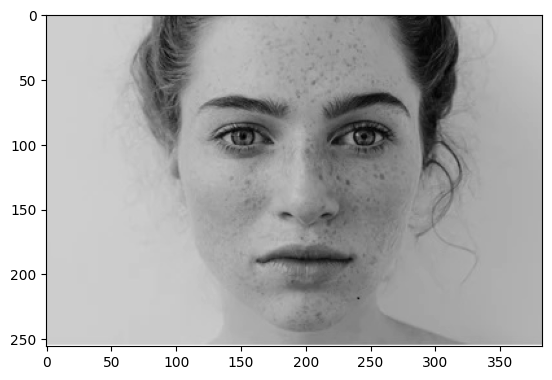

In [14]:
face=img_load(r"C:/Users/MJ/Desktop/HW2_Beautify/pic.jpg")
plt.imshow(face,cmap='gray')

In [15]:
fft_face = np.fft.fft2(face)
fft_img=np.abs(fft_face)

fft_face= np.fft.fftshift(fft_face)
shift_img=np.abs(fft_face)

log_img = np.log(np.abs(fft_face))

Text(0.5, 1.0, 'Log FFT')

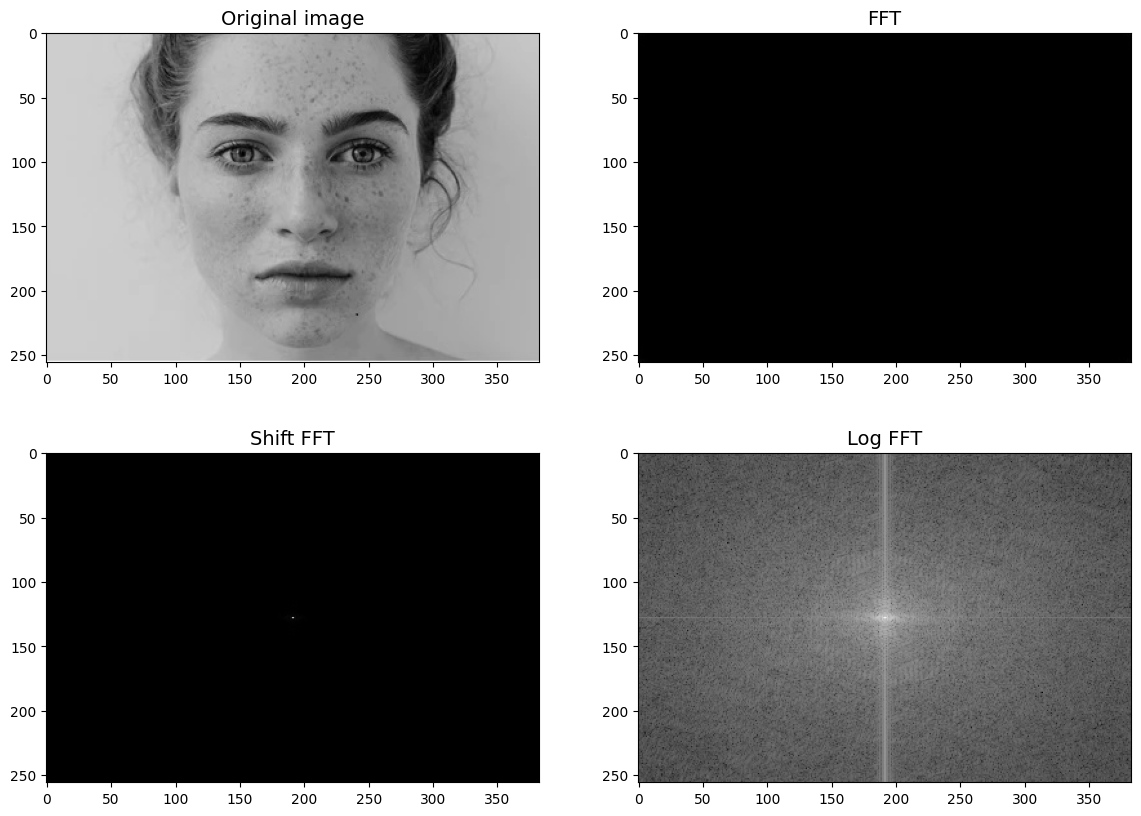

In [16]:
fig = plt.figure(figsize=(14, 10))

ax1, ax2 = fig.add_subplot(221), fig.add_subplot(222)
ax3, ax4 = fig.add_subplot(223), fig.add_subplot(224)

ax1.imshow(face, cmap='gray')
ax1.set_title('Original image', fontsize=14)

ax2.imshow(fft_img, cmap='gray')
ax2.set_title('FFT', fontsize=14)

ax3.imshow(shift_img, cmap='gray')
ax3.set_title('Shift FFT', fontsize=14)

ax4.imshow(log_img, cmap='gray')
ax4.set_title('Log FFT', fontsize=14)

In [17]:
#Ideal lowpass filter
def ILPF(fft_face,d0):
    
    mask=np.zeros(fft_face.shape,dtype='float')
    for i in range(fft_face.shape[0]):
        for j in range(fft_face.shape[1]):
            d = np.sqrt((i - fft_face.shape[0] / 2) ** 2 + (j - fft_face.shape[1] / 2) ** 2)
            if d<=d0:
                mask[i, j] = 1
            else:
                mask[i, j] = 0

    face_filtered = fft_face * mask
    face_filtered = np.fft.ifftshift(face_filtered)
    img_filtered = np.abs(np.fft.ifft2(face_filtered))
    
    return img_filtered


Text(0.5, 0.7, 'Ideal lowpass image')

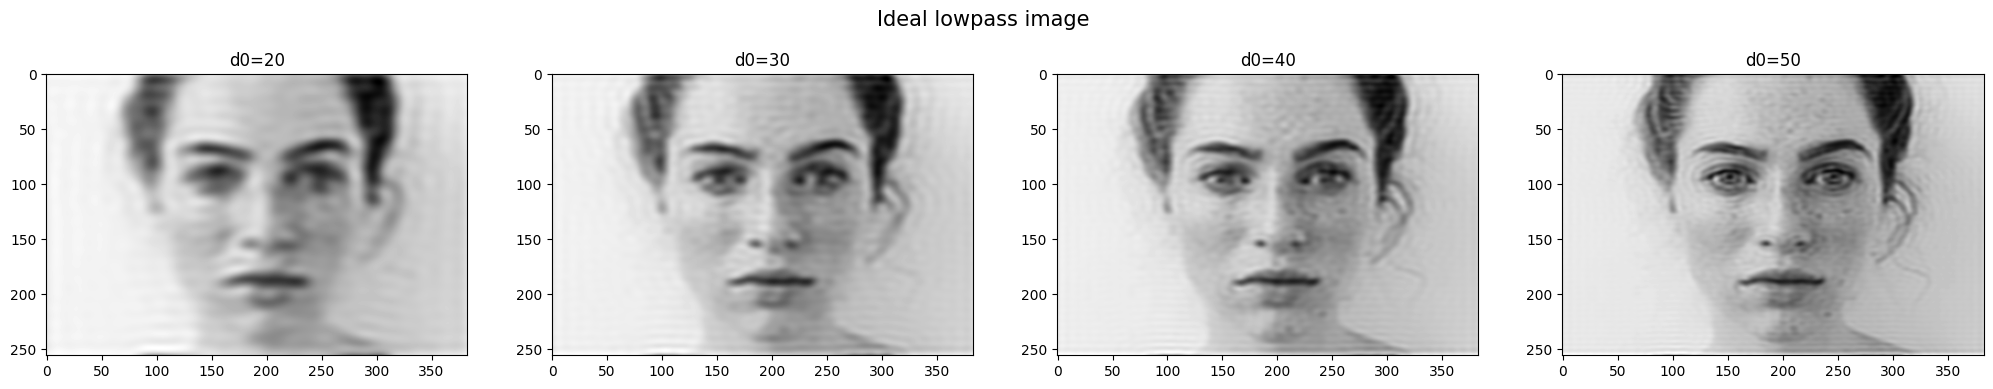

In [18]:
#Ideal lowpass image
fig, axs = plt.subplots(1,4,figsize=(25,10))
for i in range(4):
    axs[i].imshow(ILPF(fft_face,20+10*i),cmap='gray')
    axs[i].set_title(f'd0={20+10*i}')

plt.suptitle("Ideal lowpass image",y=0.7,fontsize=15)

Text(0.5, 1.0, 'Ideal Lowpass Image')

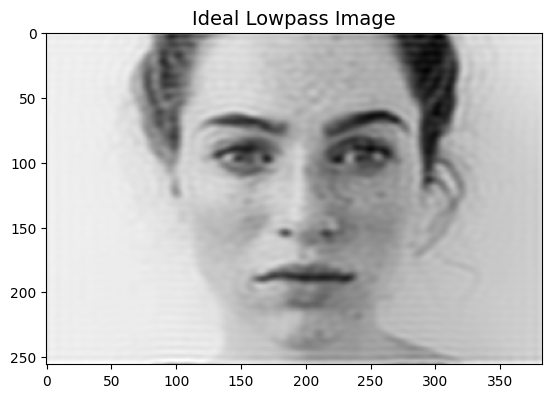

In [19]:
ideal_lowpass = ILPF(fft_face,40)
plt.imshow(ideal_lowpass,cmap='gray')
plt.title("Ideal Lowpass Image", fontsize=14)

In [20]:
#Butterworth Ideal lowpass filter
def BILF(fft_face,d0,n):
    mask=np.zeros(fft_face.shape,dtype='float')
    for i in range(fft_face.shape[0]):
        for j in range(fft_face.shape[1]):
            d = np.sqrt((i - fft_face.shape[0] / 2) ** 2 + (j - fft_face.shape[1] / 2) ** 2)
            mask[i,j]=1/(1+(d/d0)**(2*n))


    face_filtered = fft_face * mask
    f_filtered = np.fft.ifftshift(face_filtered)
    img_filtered = np.abs(np.fft.ifft2(f_filtered))
    
    return img_filtered

Text(0.5, 0.91, 'Butterworth Ideal lowpass image')

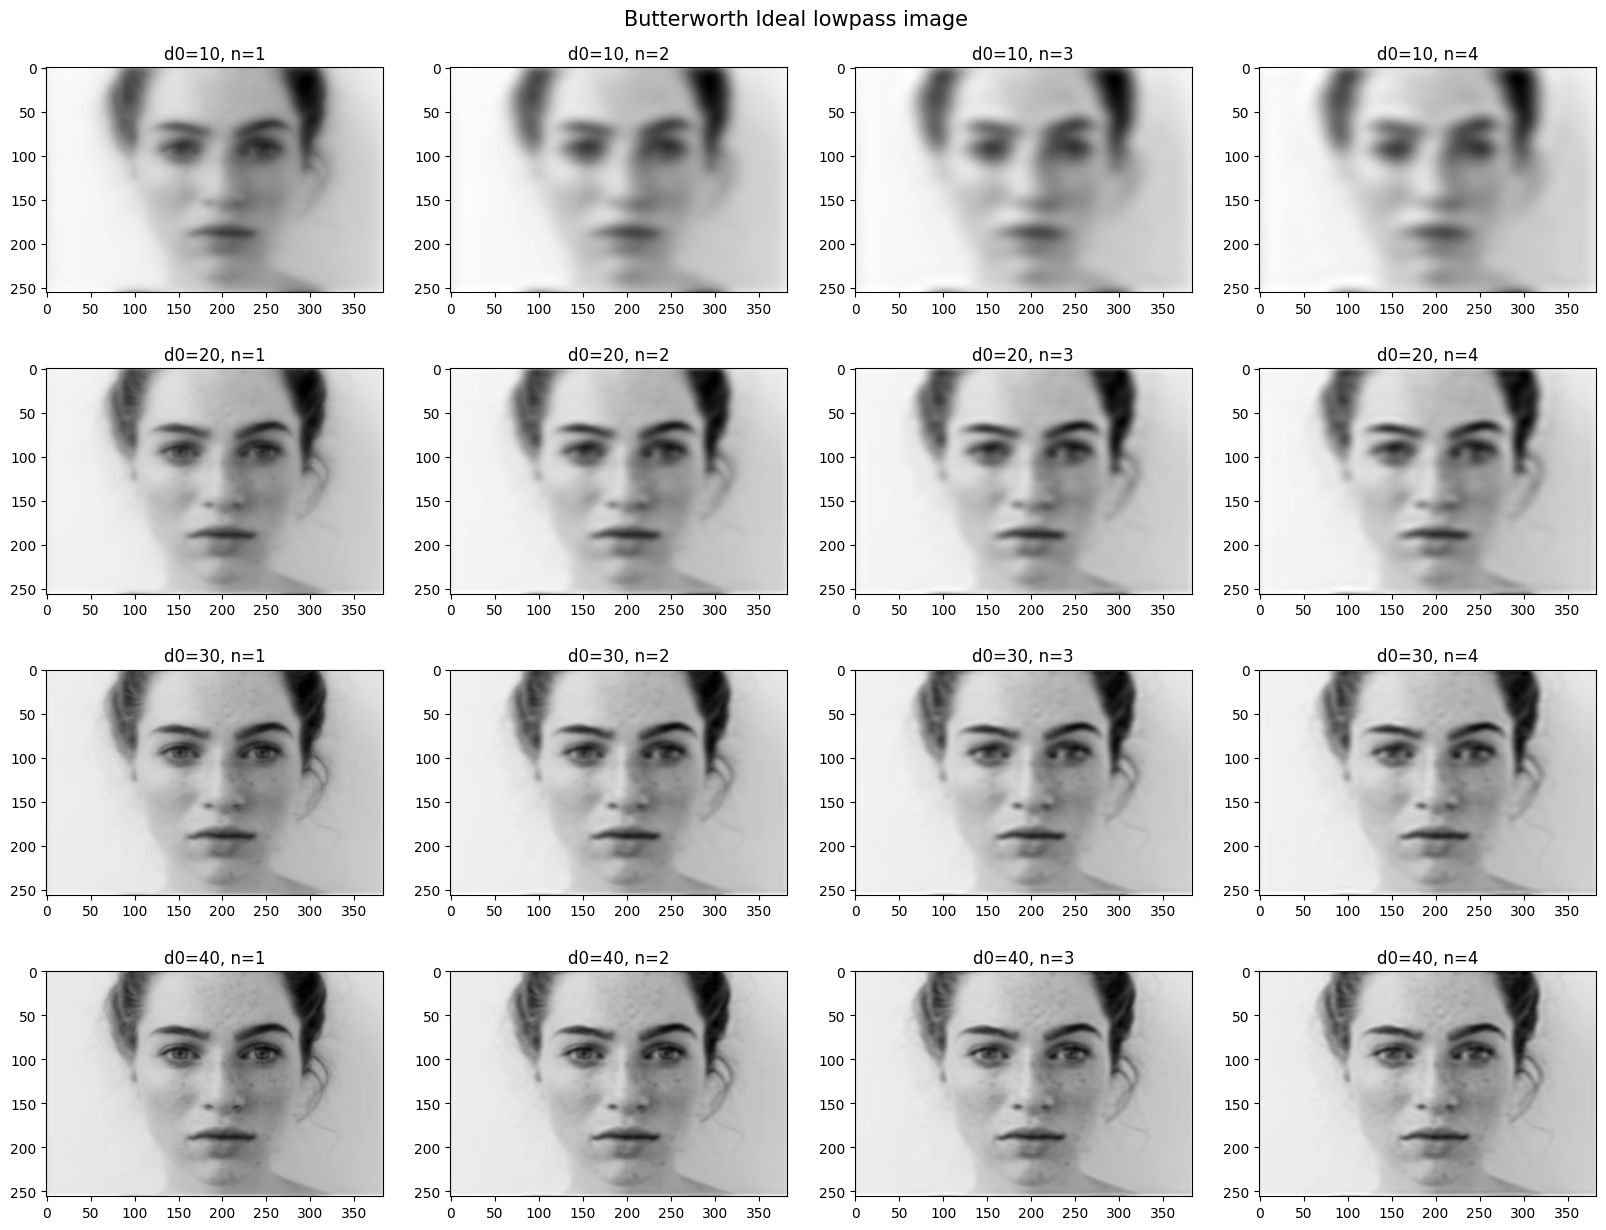

In [21]:
#Butterworth Ideal lowpass image
fig, axs = plt.subplots(4,4,figsize=(20,15))
for i in range(4):
    for j in range(4):
        axs[i,j].imshow(BILF(fft_face,10+10*i,j+1),cmap='gray')
        axs[i,j].set_title(f'd0={10+10*i}, n={j+1}')


plt.suptitle("Butterworth Ideal lowpass image",y=0.91,fontsize=15)

Text(0.5, 1.0, 'Butterworth Lowpass Image')

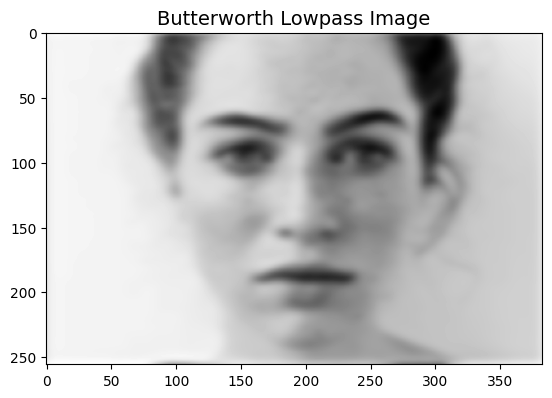

In [22]:
butterworth_lowpass=BILF(fft_face,20,2)
plt.imshow(butterworth_lowpass,cmap='gray')
plt.title("Butterworth Lowpass Image", fontsize=14)

In [23]:
#Gaussian lowpass filter
def GLPF(fft_face,d0):
    mask=np.zeros(fft_face.shape,dtype='float')
    for i in range(fft_face.shape[0]):
        for j in range(fft_face.shape[1]):
            d = np.sqrt((i - fft_face.shape[0] / 2) ** 2 + (j - fft_face.shape[1] / 2) ** 2)
            mask[i,j]=np.exp(-d**2/(2*d0**2))

            
    face_filtered = fft_face * mask
    f_filtered = np.fft.ifftshift(face_filtered)
    img_filtered = np.abs(np.fft.ifft2(f_filtered))
    
    return img_filtered
    

Text(0.5, 1.0, 'Gaussian Lowpass Image')

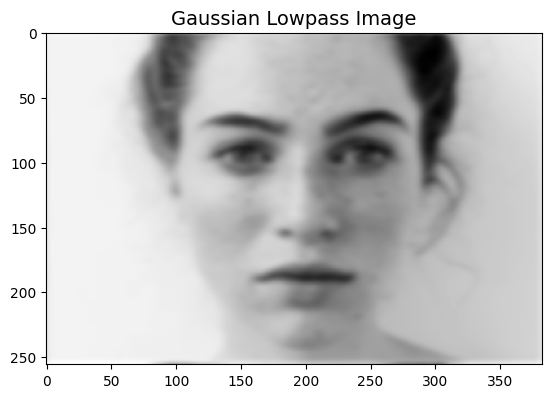

In [24]:
gaussian_lowpass=GLPF(fft_face,20)
plt.imshow(gaussian_lowpass,cmap='gray')
plt.title("Gaussian Lowpass Image", fontsize=14)

Text(0.5, 0.7, 'Gaussian lowpass image')

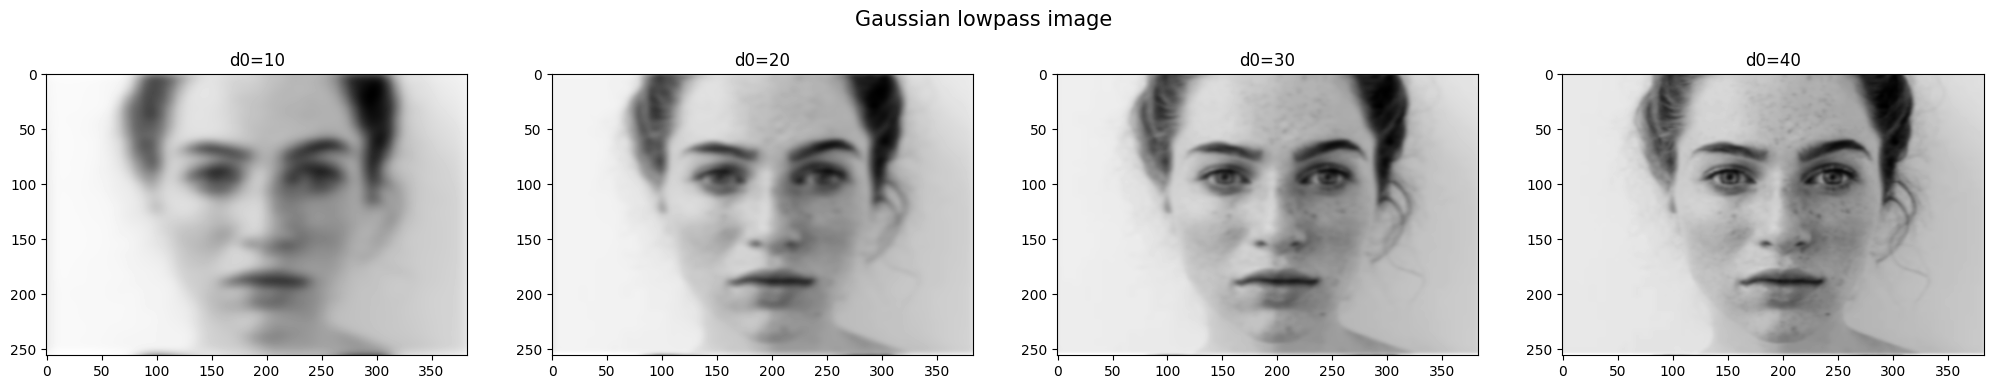

In [25]:
#Gaussian lowpass image
fig, axs = plt.subplots(1,4,figsize=(25,10))
for i in range(4):
    axs[i].imshow(GLPF(fft_face,10+10*i),cmap='gray')
    axs[i].set_title(f'd0={10+10*i}')

plt.suptitle("Gaussian lowpass image",y=0.7,fontsize=15)


Text(0.5, 1.0, '(ILPF+BILF+GLPF)/3 image')

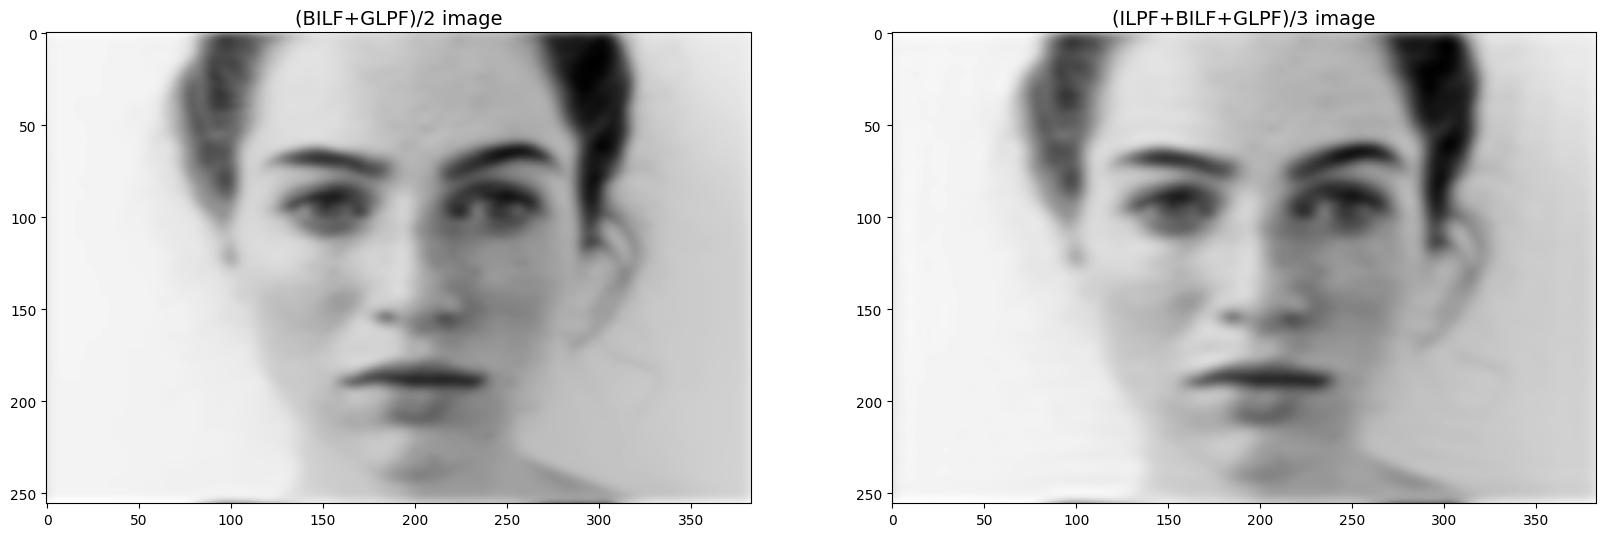

In [26]:
ensemble_2=(BILF(fft_face,20,2)+GLPF(fft_face,20))/2
ensemble_3=(ILPF(fft_face,20)+BILF(fft_face,20,2)+GLPF(fft_face,20))/3


fig = plt.figure(figsize=(20, 10))

ax1, ax2 = fig.add_subplot(121), fig.add_subplot(122)

ax1.imshow(ensemble_2, cmap='gray')
ax1.set_title('(BILF+GLPF)/2 image', fontsize=14)

ax2.imshow(ensemble_3, cmap='gray')
ax2.set_title('(ILPF+BILF+GLPF)/3 image', fontsize=14)


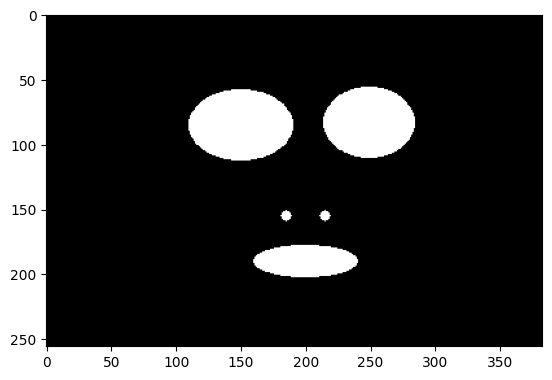

In [27]:
#不要做blur的區域
pic=np.zeros(face.shape, face.dtype)
pic_not=np.zeros(face.shape, face.dtype)

area=cv2.ellipse(pic,(195, 100),(140,90),90, 0, 360,255,-1)
area_not=cv2.ellipse(pic_not,(150, 85),(40,27),0, 0, 360,255,-1)
area_not=cv2.ellipse(pic_not,(249, 83),(35,27),0, 0, 360,255,-1)
area_not=cv2.ellipse(pic_not,(249, 83),(35,27),0, 0, 360,255,-1)
area_not=cv2.ellipse(pic_not,(200, 190),(40,12),0, 0, 360,255,-1)
area_not=cv2.circle(pic_not,(185, 155),4,255,-1)
area_not=cv2.circle(pic_not,(215, 155),4,255,-1)
plt.imshow(area_not,cmap='gray')

In [28]:
def area_filter(filtered_img):
    img=np.zeros(face.shape,dtype='float')
    for i in range(face.shape[0]):
        for j in range(face.shape[1]):
            
            if(area[i,j]==255 and area_not[i,j]!=255):
                img[i,j]=filtered_img[i,j]
            else:
                img[i,j]=face[i,j]
    return img

In [29]:
ideal=area_filter(ideal_lowpass)
butterworth=area_filter(butterworth_lowpass)
gaussian=area_filter(gaussian_lowpass)
ensemble_2=area_filter(ensemble_2)
ensemble_3=area_filter(ensemble_3)

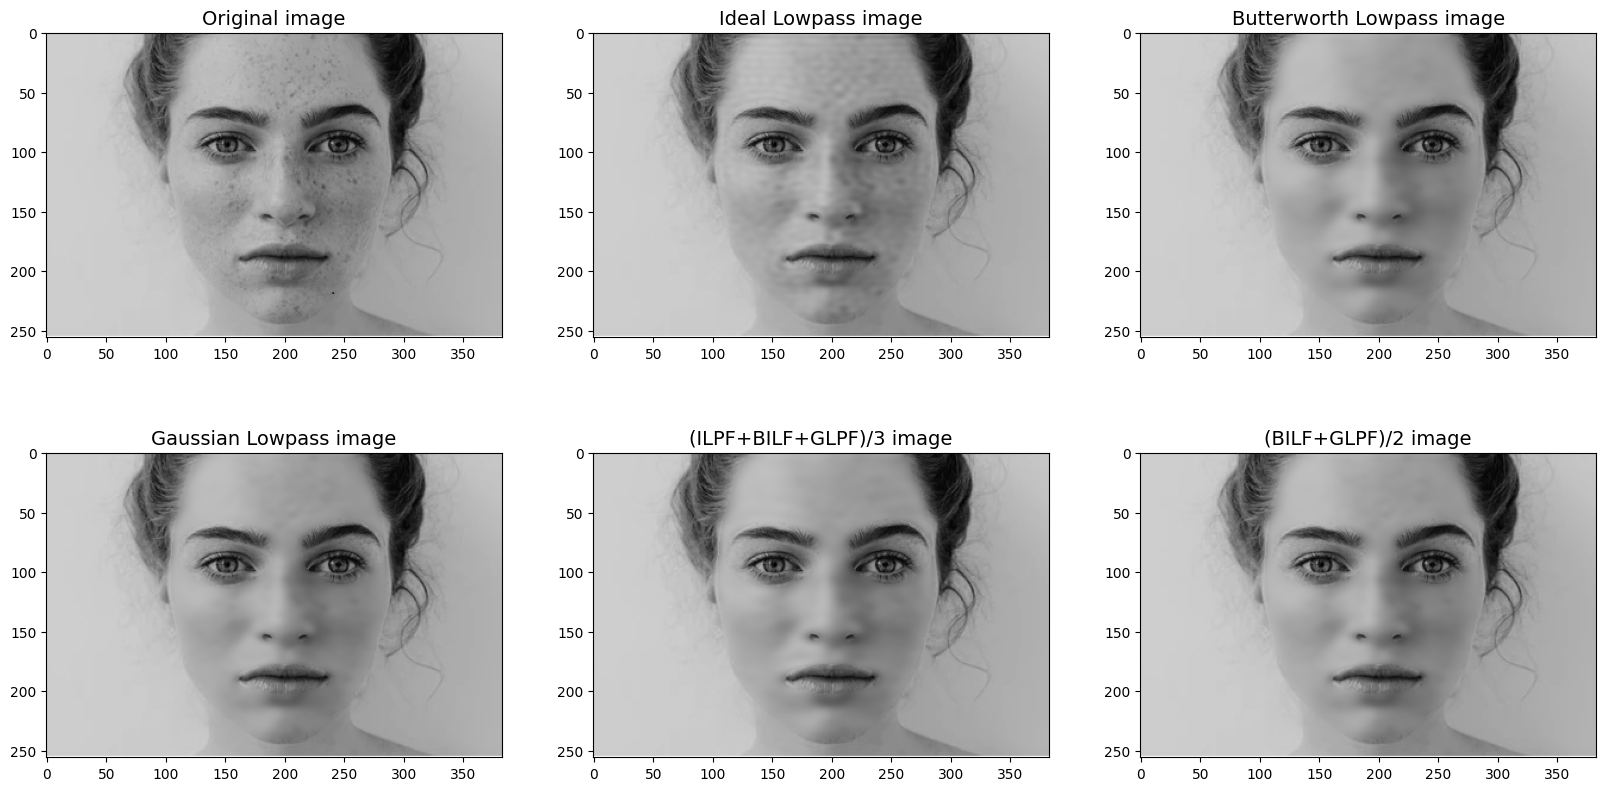

In [32]:
fig = plt.figure(figsize=(20, 10))

ax1, ax2 = fig.add_subplot(231), fig.add_subplot(232)
ax3, ax4 = fig.add_subplot(233), fig.add_subplot(234)
ax5, ax6 = fig.add_subplot(235), fig.add_subplot(236)


ax1.imshow(face, cmap='gray')
ax1.set_title('Original image', fontsize=14)

ax2.imshow(ideal, cmap='gray')
ax2.set_title('Ideal Lowpass image', fontsize=14)

 
ax3.imshow(butterworth, cmap='gray')
ax3.set_title('Butterworth Lowpass image', fontsize=14)


ax4.imshow(gaussian, cmap='gray')
ax4.set_title('Gaussian Lowpass image', fontsize=14)

ax5.imshow(ensemble_3, cmap='gray')
ax5.set_title('(ILPF+BILF+GLPF)/3 image', fontsize=14)

ax6.imshow(ensemble_2, cmap='gray')
ax6.set_title('(BILF+GLPF)/2 image', fontsize=14)

plt.show()

In [37]:
cv2.imwrite('ideal.jpg', ideal)
cv2.imwrite('butterworth.jpg', butterworth)
cv2.imwrite('gaussian.jpg', gaussian)
cv2.imwrite('ensemble_3.jpg', ensemble_3)
cv2.imwrite('ensemble_2.jpg', ensemble_2)

True